In [22]:
!pip3 install torch

In [23]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [24]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))
print(y.shape)

(100,)


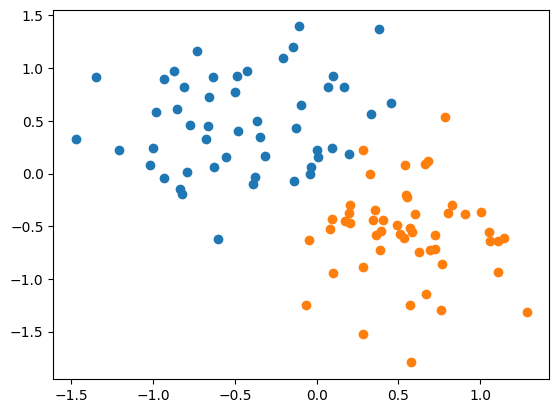

In [25]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])


scatter_plot()

In [26]:
class Model(nn.Module):
  def __init__(self, input_size,output_size):
    super().__init__()
    self.linear = nn.Linear(input_size,output_size)

  def forward(self, x):
    return torch.sigmoid(self.linear(x))

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [27]:
torch.manual_seed(2)
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [28]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
def get_params():
  return (w1.item(), w2.item(), b[0].item())
'''
Purpose of .item()
    1-Extracting Scalar Values: The .item() method is specifically designed to retrieve the value of a tensor that contains only one element (a 0-dimensional tensor).
     It converts this value into a standard Python number, such as an int or float. This is particularly useful when you need to log or display scalar values, such as loss or predictions.
    2-Conversion to Standard Python Type: When you call .item(), it returns the value as a standard Python type, which can be more convenient for various operations in Python,
     especially when interfacing with libraries that expect native Python types rather than PyTorch tensors.
'''

'\nPurpose of .item()\n    1-Extracting Scalar Values: The .item() method is specifically designed to retrieve the value of a tensor that contains only one element (a 0-dimensional tensor).\n     It converts this value into a standard Python number, such as an int or float. This is particularly useful when you need to log or display scalar values, such as loss or predictions.\n    2-Conversion to Standard Python Type: When you call .item(), it returns the value as a standard Python type, which can be more convenient for various operations in Python,\n     especially when interfacing with libraries that expect native Python types rather than PyTorch tensors.\n'

In [29]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2, 2])
  # 0 = w1x1 + w2x2 + b
  # x2 is renamed form of y
  # b is the bias of a perceptron
  x2 = (w1*x1 + b1)/(-w2)
  plt.plot(x1, x2, 'r')
  scatter_plot()
  plt.show()

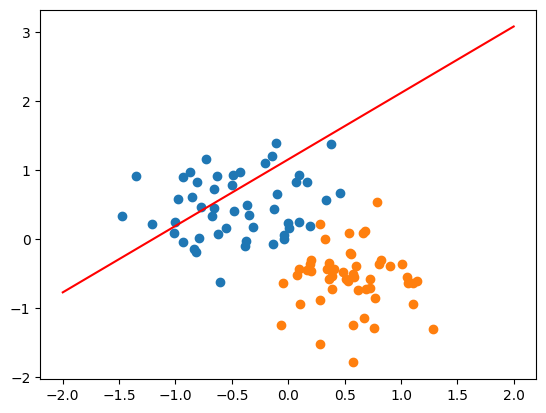

In [30]:
plot_fit('Initial Model')

In [31]:
'''
The line criterion = nn.BCELoss() in PyTorch sets up a loss function that computes the Binary Cross Entropy Loss.
This loss function is commonly used for binary classification problems where the output can be interpreted as probabilities. Here’s a detailed explanation:
What is Binary Cross Entropy Loss?

    Definition: Binary Cross Entropy (BCE) measures the difference between two probability distributions: the predicted probabilities (output of the model) and the actual binary labels (target values).
     It quantifies how well the predicted probabilities match the true labels.
    Formula: The Binary Cross Entropy Loss for a single sample can be defined mathematically as:
    BCE(y,y^)=−(y⋅log⁡(y^)+(1−y)⋅log⁡(1−y^))
    Where:
        y is the true label (0 or 1).
        y^​ is the predicted probability that the output is 1.
    Purpose: The loss function penalizes incorrect predictions more heavily. For example, if the true label is 1 but the predicted probability is low,
     the loss will be high, encouraging the model to adjust its weights to improve predictions.
'''
criterion= nn.BCELoss()
optimizer= torch.optim.SGD(model.parameters(),lr=0.01) # the parameters for update during gradient descent is model.parameters()

In [32]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss:", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss: 0.6185115575790405
epoch: 1 loss: 0.617464005947113
epoch: 2 loss: 0.6164200305938721
epoch: 3 loss: 0.6153795123100281
epoch: 4 loss: 0.6143423318862915
epoch: 5 loss: 0.6133086681365967
epoch: 6 loss: 0.612278401851654
epoch: 7 loss: 0.6112515330314636
epoch: 8 loss: 0.6102280020713806
epoch: 9 loss: 0.6092078685760498
epoch: 10 loss: 0.6081911325454712
epoch: 11 loss: 0.607177734375
epoch: 12 loss: 0.6061676740646362
epoch: 13 loss: 0.6051609516143799
epoch: 14 loss: 0.6041575074195862
epoch: 15 loss: 0.6031573414802551
epoch: 16 loss: 0.6021605730056763
epoch: 17 loss: 0.6011670231819153
epoch: 18 loss: 0.6001767516136169
epoch: 19 loss: 0.5991896986961365
epoch: 20 loss: 0.5982059240341187
epoch: 21 loss: 0.5972253680229187
epoch: 22 loss: 0.5962480306625366
epoch: 23 loss: 0.5952739119529724
epoch: 24 loss: 0.5943029522895813
epoch: 25 loss: 0.5933352112770081
epoch: 26 loss: 0.5923705697059631
epoch: 27 loss: 0.5914091467857361
epoch: 28 loss: 0.5904508233070374
e

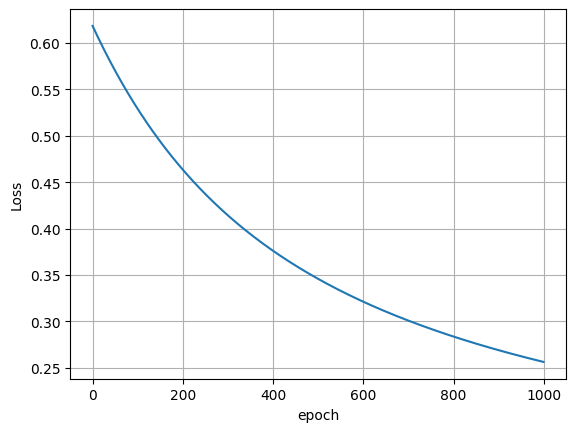

In [33]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.grid()

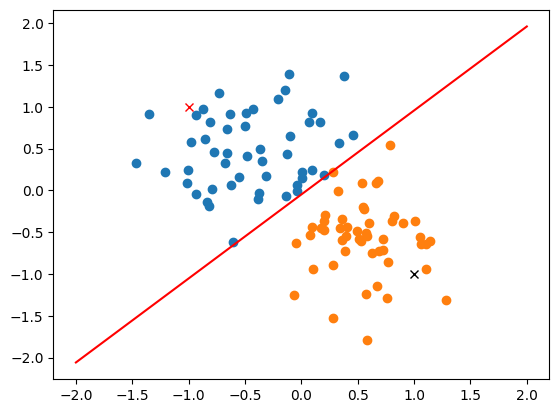

In [34]:
point1= torch.Tensor([1.0,-1.0])
point2= torch.Tensor([-1.0,1.0])
plt.plot(point1.numpy()[0],point1.numpy()[1],'kx')
plt.plot(point2.numpy()[0],point2.numpy()[1],'rx')
plot_fit("Trained Model")

In [35]:
# test some point (the x ones)
print(model.predict(point1))
print(model.predict(point2))

1
0
